<a href="https://colab.research.google.com/github/phil369/TSP_Python/blob/master/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
import math as math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import FancyArrowPatch

[[7.97757203e+00 1.94971811e-02]
 [5.53601550e+00 7.55912183e-03]
 [4.75290002e+00 3.10754124e+00]
 [8.56728015e+00 8.56907432e+00]
 [7.82428826e+00 3.20417894e+00]
 [6.34706915e+00 3.39286839e+00]
 [4.45173566e-01 9.11657604e+00]
 [4.13541614e+00 6.30823023e-01]
 [3.81614120e+00 2.06029298e-01]
 [6.50938965e+00 1.76529080e+00]]


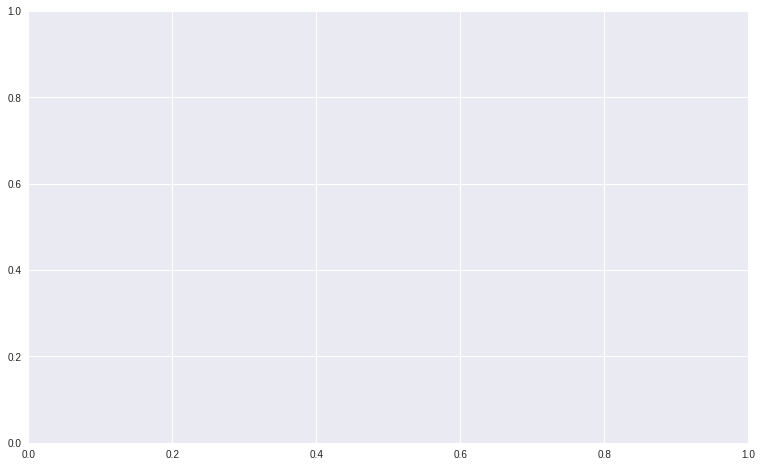

In [2]:
#defining travelpoints
points = np.random.random((10,2)) * 10
lines = np.array([])
labels = []
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

print(points)

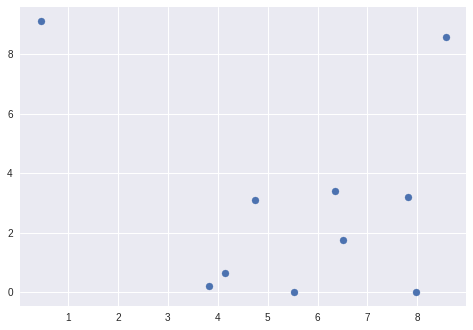

In [3]:
#plotting the travelpoints
x = np.array([])
y = np.array([])

for p in points:
    x = np.append(x, p[0])
    y = np.append(y, p[1])

plt.scatter(x,y)
plt.show()

In [4]:
#function for calculating the distances
def dist(A, B):
    distAB = math.sqrt(((A[0] - B[0])**2) + ((A[1] - B[1])**2))
    return distAB

print(dist(points[0], points[1]))

2.441585712910416


In [0]:
#creating functions for drawing the lines
def random_color():
    rgbl=[255,0,0]
    random.shuffle(rgbl)
    return tuple(rgbl)

#find line limits
def newline(A, B):
    XY = [[A[0], B[0]], [A[1], B[1]]]
    x, y = XY[0], XY[1]
    return[x, y]

#find the middle on the direct path between two points
def findMiddle(A, B):
    return [((A[0]+B[0])/2), ((A[1]+B[1])/2)]
 
#draw the line
def drawLine(A, B, n):
    distIJ = round(dist(A, B), 2)
    mid = findMiddle(A, B)
    line = newline(A, B)
    #lines = np.append(lines, line)
    ax = plt.plot(line[0], line[1], c=np.random.rand(3,), label="line number: " + str(int(n)))
    plt.annotate(str(distIJ), xy=(mid[0], mid[1]))

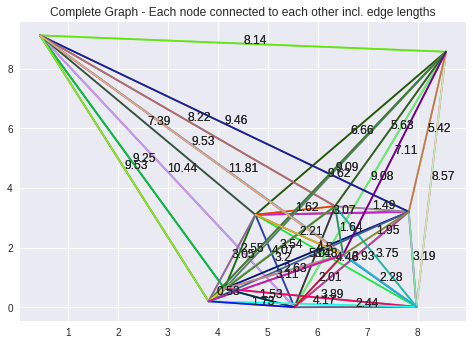

In [6]:
n = 1
for i in points:
    for j in points:
        if (np.all(i != j)):
            drawLine(i, j, n)
            n += 1

plt.title('Complete Graph - Each node connected to each other incl. edge lengths')
#plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

Summed up Path Length: 29.15254413304804


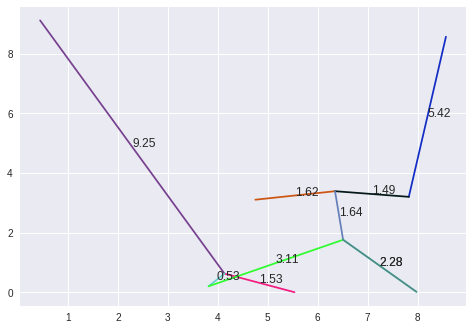

In [7]:
#calculating paths with nearest neighbour algorithm

def NN(points):
    #initialize
    unvisited = np.array([], ndmin=2)
    visited = np.array([])
    shortestLines = np.array([])
    distPath = 0
    
    #new array for operations
    unvisited = np.copy(points)

    #reshape the array to match the same format as "points", but with an additional "visited"-property (a zero-column)
    unvisited = np.reshape(unvisited, (-1, 2))
    unvisited = np.c_[unvisited, np.zeros(len(points))]
    #fl = unvisited.flat
    counter = 1
    
    #print(unvisited)
    for i in unvisited:
        if i[2] == 0:
            #i[2] = 1
            shortestDist = 10000
            visited = np.append(visited, i)
            nextN = np.array([])
            c = 0
            arrPos = -1
            for j in unvisited:
                #print(j)
                if ((np.any(i != j)) and (j[2] == 0)):
                    if(dist(i, j) < shortestDist):
                        shortestDist = dist(i, j)
                        #print(str(shortestDist))
                        nextN = j
                        arrPos = c
                c += 1
            if nextN.size == 0:
                #print('TRUE')
                nextN = unvisited[0]
                shortestDist = dist(i, nextN)
            #print('nextN: ' + str(nextN))
            #print(str(counter) + ": i: " + str(i) + ", nextN: " + str(nextN) + "arrPos: " + str(arrPos) + ", shortestDist: " + str(shortestDist))
            #nextN[2] = 1
            i[2] = 1
            visited = np.append(visited, nextN)
            #drawLine(i, nextN, c)
            mid = findMiddle(i, nextN)
            pathLine = newline(i, nextN)
            ax = plt.plot(pathLine[0], pathLine[1], c=np.random.rand(3,), label="line number: " + str(n))
            plt.annotate(str(round(shortestDist, 2)), xy=(mid[0], mid[1]))
            
            #shortestLines = np.append(shortestLines, pathLine)
            distPath += dist(i, nextN)
            counter += 1
    
    print("Summed up Path Length: " + str(distPath))
    
NN(points)

## TODO: FIND path from the TEMPORARY node --> without first for-loop

In [0]:
def compAdjList(tmp, tmpPos, adjList, unvisited, shortestDist, n):
    nextN = np.array([])
    for i in adjList:
        if (i[2] == 0):
            if(dist(tmp, i) < shortestDist):
                shortestDist = dist(tmp, i)
                nextN = i
    
    if (nextN.size == 0) and (np.array_equal(nextN, unvisited[0])):
        nextN = unvisited[0]
        drawLine(tmp, nextN, n)
        #print(nextN)
    elif (nextN.size != 0):
        nextN[2] = 1
        drawLine(tmp, nextN, n)
        tmp = nextN
        tmpPos = nextN[3]
        unvisited[int(nextN[3])][2] = 1
    
    return tmp

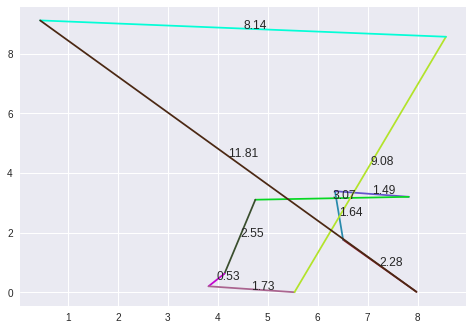

In [9]:
def NN_new(points):
    #initialize
    unvisited = np.copy(points)
    shortestLines = np.array([])
    distPath = 0
    shortestDist = 10000
    
    #reshape the array to match the same format as "points", but with an additional "visited"-property (a zero-column)
    #and an index-column
    unvisited = np.reshape(unvisited, (-1, 2))
    unvisited = np.c_[unvisited, np.zeros(len(points))]
    unvisited = np.c_[unvisited, range(len(points))]
    
    #starting node
    tmp = unvisited[0]
    tmpPos = tmp[3]
    #print(unvisited)
    
    #find nearest neighbour
    adjList = np.delete(unvisited, 0, 0)    
    n = 1
    tmpNext = compAdjList(tmp, tmpPos, adjList, unvisited, shortestDist, n)
    curValues = [tmpNext, tmpPos, adjList, unvisited, shortestDist, n]
    
    
    for i in range(0,len(points-1)):
        n = i + 2
        #curValues = compAdjList(tmpNext, tmpPos, adjList, unvisited, shortestDist, n)
        tmpNext = compAdjList(tmpNext, tmpPos, adjList, unvisited, shortestDist, n)
        
    drawLine(tmpNext, unvisited[0], n+1)
    
    #plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
    plt.show()
            
    #shortestLines = np.append(shortestLines, pathLine)
    #distPath += dist(start, nextN)
                    
    #print("Summed up Path Length: " + str(distPath))            
   
NN_new(points)